<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/FIFA/FIFA_payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON FIFA 선수 이적료 예측 경진대회
대회 사이트: https://dacon.io/competitions/open/235538/data

# 목차
0. 데이터 로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 결론

* 참고



# 0.데이터로드

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_test.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/FIFA_train.csv ./
!cp /gdrive/MyDrive/Dacon_study/FIFA/submission.csv ./

In [ ]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


* id: 선수 고유 아이디
* name: 이름
* age: 나이
* continent : 선수 국적이 포함된 대륙
* contract_until: 선수 계약 기간이 언제까지인지
* position: 선수가 선호하는 포지션 ex) 공격수, 수비수 등
* prefet_foot : 선수가 선호하는 발 ex)오른발
* reputation: 선수가 윰여한 정도 ex) 높은 수치일 수록 유명한 선수
* stat_overall : 선수의 현재 능력치
* stat_potential: 선수가 경험 및 노력을 통해 발전할 수 있는 정도
* stat_skill_moves: 선수의 개인기 능력칙
* value: FIFA가 선정한 선수 이적 시장 가격 (단위:유로)

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
print(train.shape)
print(test.shape)

(8932, 12)
(3828, 11)


# 1.데이터 EDA, visualization

In [ ]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## data cleansing

In [ ]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

null값 처리 불필요

In [ ]:
# 10 players who have high value
train.sort_values(by='value',ascending=False).head(10)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
26,45,P. Pogba,25,europe,2021,MF,right,4.0,87,91,5.0,64000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
27,47,R. Lukaku,25,europe,2022,ST,left,3.0,87,89,3.0,62500000.0


연봉 Top 10 선수들

In [ ]:
# 10 players who have high reputation 
train.sort_values(by='reputation',ascending=False).head(10)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
65,109,Z. Ibrahimović,36,europe,2022,ST,right,5.0,85,85,5.0,14000000.0
12,22,M. Neuer,32,europe,2021,GK,right,5.0,89,89,1.0,38000000.0
61,105,K. Benzema,30,europe,2021,ST,right,4.0,85,85,4.0,37000000.0
32,54,Piqué,31,europe,2022,DF,right,4.0,87,87,2.0,34000000.0
38,66,T. Müller,28,europe,2021,MF,right,4.0,86,86,3.0,45000000.0
40,68,M. Reus,29,europe,2023,MF,right,4.0,86,86,4.0,43500000.0
43,76,Iniesta,34,europe,2021,ST,right,4.0,86,86,4.0,21500000.0
231,378,Hulk,31,south america,2020,MF,left,4.0,81,81,4.0,15500000.0


기여 top 10 선수들

메시, 수아레즈는 연봉도 제일 높고 기여도도 높다

In [ ]:
# continent별 reputation, stat_overall, stat_potential, stat_skill_moves 평균 
train.groupby('continent')['reputation','stat_overall','stat_potential','stat_skill_moves','value'].mean().reset_index()

,continent,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,africa,1.122053,68.041609,72.360610,2.606103,2.972247e+06
1,asia,1.054638,63.381194,68.208386,2.259212,1.035146e+06
2,europe,1.146937,67.083051,72.387636,2.371665,2.928125e+06
3,oceania,1.022857,63.011429,68.640000,2.234286,8.225429e+05
4,south america,1.130773,68.643487,72.635184,2.481578,3.183204e+06


대륙별 기여도 평균: 아프라카> 아시아> 유럽 > 오세아니아 > 남아메리카

## 시각화

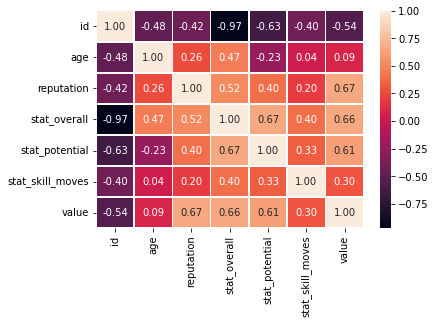

In [ ]:
# 상관계수
plt.figure()
sns.heatmap(data=train.corr(),annot=True,fmt='.2f',linewidths=.5)

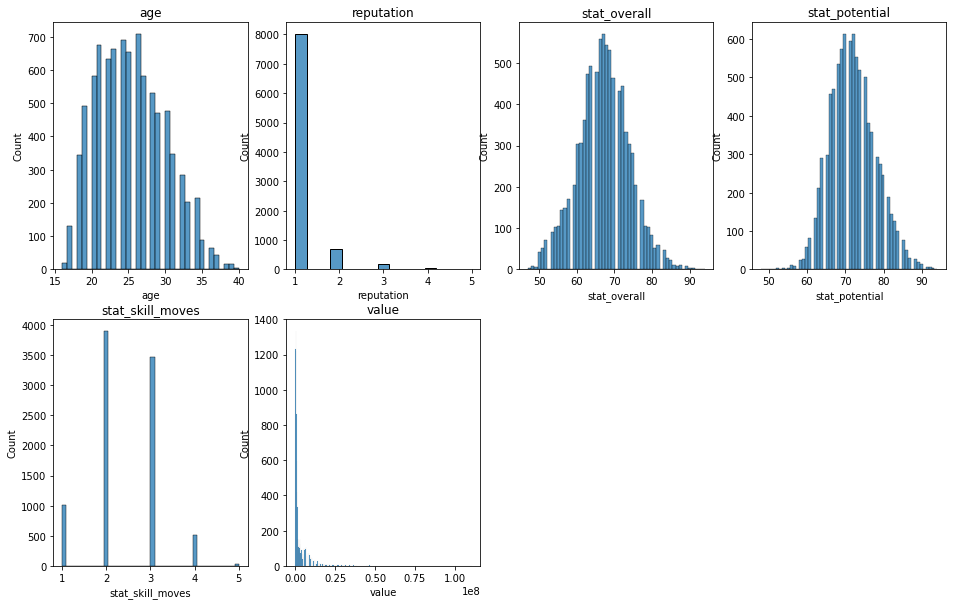

In [ ]:
# histplot으로 수치형 데이터 분포 확인
plt.figure(figsize=(16,10))

cols = train.columns[7:].insert(0,'age')
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title(cols[i])
  sns.histplot(train[cols[i]])
plt.show()

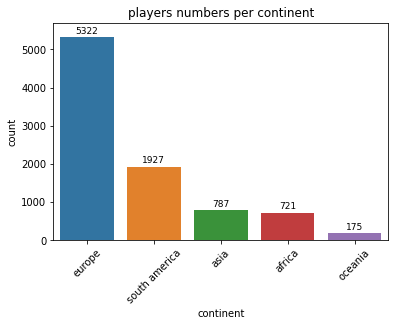

In [ ]:
ax= sns.countplot(x='continent',data=train, order = train['continent'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,5700)

plt.xticks(rotation=45)

plt.title('players numbers per continent')
plt.show()

유럽출신 선수들이 제일 많다

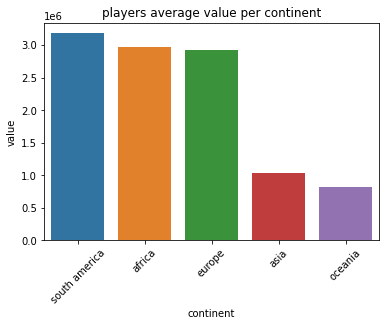

In [ ]:
plt.figure()
sns.barplot(x='continent',y='value',data=train.groupby('continent')['value'].mean().reset_index().sort_values(by='value',ascending=False))

plt.xticks(rotation=45)

plt.title('players average value per continent')
plt.show()

value 평균 : south america > africa > europe > asia > oceania

In [ ]:
train.groupby('continent')['value'].mean().reset_index().sort_values(by='value',ascending=False)

,continent,value
4,south america,3.183204e+06
0,africa,2.972247e+06
2,europe,2.928125e+06
1,asia,1.035146e+06
3,oceania,8.225429e+05


대륙별 value 평균 : south america > africa > europe > asia > oceania

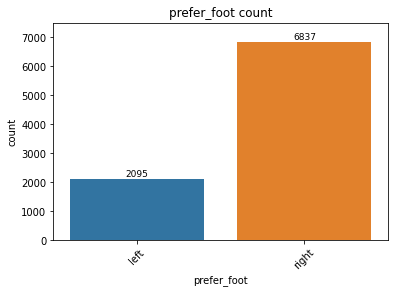

In [ ]:
ax= sns.countplot(x='prefer_foot',data=train)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,7500)

plt.xticks(rotation=45)

plt.title('prefer_foot count')
plt.show()

오른발 선호하는 선수가 매우 많음

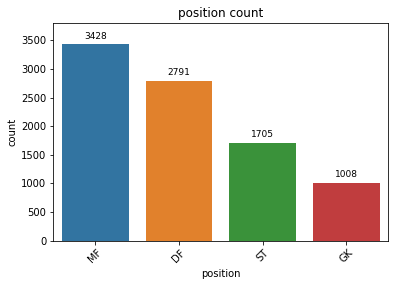

In [ ]:
ax= sns.countplot(x='position',data=train, order= train['position'].value_counts().index)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 9)
ax.set_ylim(0,3800)

plt.xticks(rotation=45)

plt.title('position count')
plt.show()

MF (미드필더) > DF(Defensive Midfielder) > ST(striker) > GK (골키퍼)

# 2.데이터전처리

In [ ]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [ ]:
# 계약 연도 추출
train['contract_until'] = train['contract_until'].str[-4:].astype(int)
test['contract_until'] = test['contract_until'].str[-4:].astype(int)

In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

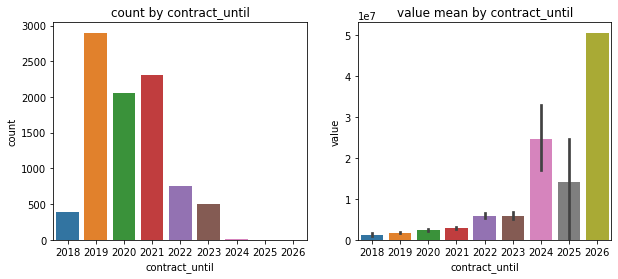

In [ ]:
plt.figure(figsize=(10,4))
ax1=plt.subplot(1,2,1)
sns.countplot(x='contract_until',data=train)
plt.title("count by contract_until")

ax2=plt.subplot(1,2,2)
sns.barplot(x='contract_until',y='value', data=train)
plt.title("value mean by contract_until")
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   int64  
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 837.5+ KB


## 라벨인코딩

In [ ]:
train.groupby('continent').value.mean().sort_values()

continent
oceania          8.225429e+05
asia             1.035146e+06
europe           2.928125e+06
africa           2.972247e+06
south america    3.183204e+06
Name: value, dtype: float64

In [ ]:
train["continent_rank"] = train.continent.map({'oceania':1, 'asia': 2,'europe':3, 'africa':4, 'south america':5})
test["continent_rank"] = test.continent.map({'oceania':1, 'asia': 2,'europe':3, 'africa':4, 'south america':5})

In [ ]:
train.groupby('position').value.mean().sort_values()

position
GK    1.992073e+06
DF    2.304348e+06
MF    3.121762e+06
ST    3.330361e+06
Name: value, dtype: float64

In [ ]:
# train['position_rank'] = train.position.map({'GK':1,'DF':2,'MF':3,'ST':4})
# test['position_rank'] = test.position.map({'GK':1,'DF':2,'MF':3,'ST':4})

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()

# encoder.fit(train['prefer_foot'])
# train['prefer_foot'] = encoder.transform(train['prefer_foot'])
# test['prefer_foot'] = encoder.transform(test['prefer_foot'])

## Standard Scaling

In [ ]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,continent_rank
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,5
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,3
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,5
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,3
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3


In [ ]:
#Standard scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler= StandardScaler()

# 변환 필요한 feature 선택
transform_df= train[['age','reputation','stat_overall','stat_potential','stat_skill_moves']]

std_transform_df = scaler.fit_transform(transform_df)
train[transform_df.columns] = std_transform_df
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,continent_rank
0,0,L. Messi,1.249309,south america,2021,ST,left,9.130280,3.925708,3.674598,2.059652,110500000.0,5
1,3,De Gea,0.386357,europe,2020,GK,right,6.770499,3.488041,3.507592,-1.806307,72000000.0,3
2,7,L. Suárez,1.249309,south america,2021,ST,right,9.130280,3.488041,3.173580,0.770999,80000000.0,5
3,8,Sergio Ramos,1.465046,europe,2020,DF,right,6.770499,3.488041,3.173580,0.770999,51000000.0,3
4,9,J. Oblak,-0.045118,europe,2021,GK,right,4.410719,3.342152,3.507592,-1.806307,68000000.0,3


In [ ]:
#Standard scaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
scaler= StandardScaler()

# 변환 필요한 feature 선택
transform_df= test[['age','reputation','stat_overall','stat_potential','stat_skill_moves']]

std_transform_df = scaler.fit_transform(transform_df)
test[transform_df.columns] = std_transform_df
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,continent_rank
0,1,Cristiano Ronaldo,1.664392,europe,2022,ST,right,8.599478,3.859778,3.569820,3.309849,3
1,2,Neymar Jr,0.151739,south america,2022,ST,right,8.599478,3.570255,3.406758,3.309849,5
2,4,K. De Bruyne,0.367833,europe,2023,MF,right,6.369358,3.425494,3.243695,2.029524,3
3,5,E. Hazard,0.367833,europe,2020,ST,right,6.369358,3.425494,3.080633,2.029524,3
4,6,L. Modrić,1.448299,europe,2020,MF,right,6.369358,3.425494,3.080633,2.029524,3


In [ ]:
# test 더미화
test_df = test.drop(['id','name','position','continent'],axis=1)
test_df = pd.get_dummies(test_df)

## feature engineering

# 3.모델생성 및 학습

## train, val 데이터 split

In [ ]:
X= train.drop(['id','name','continent','position','value'],axis=1)
y= np.log1p(train.value)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8932 non-null   float64
 1   contract_until    8932 non-null   int64  
 2   prefer_foot       8932 non-null   object 
 3   reputation        8932 non-null   float64
 4   stat_overall      8932 non-null   float64
 5   stat_potential    8932 non-null   float64
 6   stat_skill_moves  8932 non-null   float64
 7   continent_rank    8932 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 558.4+ KB


In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_rank,prefer_foot_left,prefer_foot_right
0,1.249309,2021,9.130280,3.925708,3.674598,2.059652,5,1,0
1,0.386357,2020,6.770499,3.488041,3.507592,-1.806307,3,0,1
2,1.249309,2021,9.130280,3.488041,3.173580,0.770999,5,0,1
3,1.465046,2020,6.770499,3.488041,3.173580,0.770999,3,0,1
4,-0.045118,2021,4.410719,3.342152,3.507592,-1.806307,3,0,1


In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=42)

## K fold

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

## NGBoost

In [ ]:
!pip install ngboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ngboost import NGBRegressor
ngb_leg = NGBRegressor(random_state = 42)

In [ ]:
rmse_list = []
ngb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  ngb_leg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in ngb_leg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in ngb_leg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  ngb_pred += (sub_pred / 10)

[iter 0] loss=1.7507 val_loss=0.0000 scale=1.0000 norm=1.2801
[iter 100] loss=0.7655 val_loss=0.0000 scale=2.0000 norm=1.1166
[iter 200] loss=-0.0854 val_loss=0.0000 scale=2.0000 norm=0.9110
[iter 300] loss=-0.6502 val_loss=0.0000 scale=2.0000 norm=0.7953
[iter 400] loss=-0.8502 val_loss=0.0000 scale=2.0000 norm=0.8514
[iter 0] loss=-0.9050 val_loss=0.0000 scale=2.0000 norm=0.9077
[iter 100] loss=-0.9325 val_loss=0.0000 scale=2.0000 norm=0.9268
[iter 200] loss=-0.9476 val_loss=0.0000 scale=1.0000 norm=0.4680
[iter 300] loss=-0.9598 val_loss=0.0000 scale=1.0000 norm=0.4691
[iter 400] loss=-0.9735 val_loss=0.0000 scale=2.0000 norm=0.9351
[iter 0] loss=-0.9777 val_loss=0.0000 scale=1.0000 norm=0.4704
[iter 100] loss=-0.9908 val_loss=0.0000 scale=1.0000 norm=0.4693
[iter 200] loss=-0.9989 val_loss=0.0000 scale=1.0000 norm=0.4708
[iter 300] loss=-1.0064 val_loss=0.0000 scale=1.0000 norm=0.4718
[iter 400] loss=-1.0168 val_loss=0.0000 scale=2.0000 norm=0.9438
[iter 0] loss=-1.0170 val_loss=0.

## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_leg = GradientBoostingRegressor(random_state=42)

### 학습

In [ ]:
rmse_list = []
gbm_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  gbm_leg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in gbm_leg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in gbm_leg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  gbm_pred += (sub_pred / 10)

## RandomForest

### 학습

In [ ]:
# 모델링 라이브러리
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
# rf_reg.fit(train_x, train_y)
# pred= rf_reg.predict(val_x)

# mse= mean_squared_error(val_y, pred)
# rmse= mse**(1/2)

# print("RMSE: ", rmse)

In [ ]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  rf_reg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in rf_reg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in rf_reg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  rf_pred += (sub_pred / 10)

## XGBoost

### 학습

In [ ]:
# 모델링 라이브러리
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42, eval_set=[val_x,val_y])

# print(len(train_x), len(val_x))
# xgb_reg.fit(train_x, train_y)
# pred = xgb_reg.predict(val_x)
# mse = mean_squared_error(val_y,pred)
# rmse = mse**(1/2)

# print("RMSE : ", rmse)

In [ ]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb_reg.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb_reg.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb_reg.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

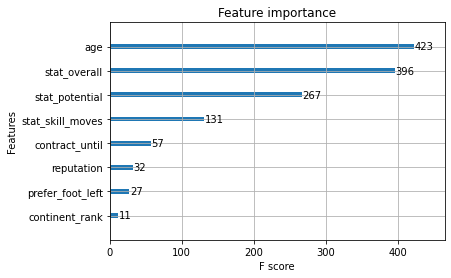

In [ ]:
xgb.plot_importance(xgb_reg)

## catboost

### 학습

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

# cat_reg.fit(train_x,train_y)
# pred = cat_reg.predict(val_x)
# mse = mean_squared_error(val_y,pred)
# rmse = mse**(1/2)

# print("RMSE: ",rmse)

In [ ]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat_reg.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

Learning rate set to 0.210599
0:	learn: 1.1397563	total: 1.71ms	remaining: 341ms
1:	learn: 0.9493761	total: 3.02ms	remaining: 299ms
2:	learn: 0.7893343	total: 4.63ms	remaining: 304ms
3:	learn: 0.6551261	total: 6.17ms	remaining: 302ms
4:	learn: 0.5459289	total: 7.68ms	remaining: 299ms
5:	learn: 0.4616073	total: 9.31ms	remaining: 301ms
6:	learn: 0.3921046	total: 10.9ms	remaining: 299ms
7:	learn: 0.3401047	total: 12.4ms	remaining: 297ms
8:	learn: 0.2940965	total: 13.9ms	remaining: 295ms
9:	learn: 0.2590365	total: 15.3ms	remaining: 291ms
10:	learn: 0.2309115	total: 16.5ms	remaining: 284ms
11:	learn: 0.2086870	total: 18ms	remaining: 282ms
12:	learn: 0.1921150	total: 19.5ms	remaining: 281ms
13:	learn: 0.1788314	total: 21ms	remaining: 279ms
14:	learn: 0.1681970	total: 22.5ms	remaining: 277ms
15:	learn: 0.1608098	total: 24ms	remaining: 277ms
16:	learn: 0.1555617	total: 25.2ms	remaining: 272ms
17:	learn: 0.1502173	total: 26.8ms	remaining: 271ms
18:	learn: 0.1463947	total: 28.2ms	remaining: 269m

## LGBM

### 학습

In [ ]:
# 모델링 관련 라이브러리
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgbm
from lightgbm import LGBMRegressor

In [ ]:
lgbm_reg = LGBMRegressor(n_estimators=200, random_state=42, eval_set=[train_x,train_y])

# print(len(train_x), len(val_x))
# lgbm_reg.fit(train_x, train_y)
# pred = lgbm_reg.predict(val_x)
# mse= mean_squared_error(val_y,pred)
# rmse= mse**(1/2)

# print("RMSE : ", rmse)

In [ ]:
rmse_list = []
lgbm_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
  tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
  val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
  lgbm_reg.fit(tr_x, tr_y)
    
  pred = np.expm1([0 if x < 0 else x for x in lgbm_reg.predict(val_x)])
  sub_pred = np.expm1([0 if x < 0 else x for x in lgbm_reg.predict(test_df)])
  rmse = np.sqrt(mean_squared_error(val_y, pred))
    
  rmse_list.append(rmse)
    
  lgbm_pred += (sub_pred / 10)

# 제출

In [ ]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
continent_rank      0
dtype: int64

In [ ]:
submission = pd.read_csv('submission.csv')
submission['value']=(rf_pred + xgb_pred + cat_pred + lgbm_pred + gbm_pred + ngb_pred)/6

In [ ]:
submission.to_csv('sub_model+kf+6.csv',index=False)

# 4. 결론

스코어 기준: RMSE
1. 22.12.19 제출 스코어: 1229799.85838
* 사용모델 : RandomForestRegressor, XGBoostRegressor
* 전처리: label encoding, feature selection
* 하이퍼파라미터 튜닝: optuna

2. 22.12.20 제출 스코어: 1137704.77912
* 사용모델:RandomForestRegressor, XGBoostRegressor, catboostRegressor
* 전처리: label encoding, feature selection, standard scaling
* 하이퍼파라미터 튜닝: optuna

3. 22.12.27 제출 스코어: 1023770.34511
* 사용모델: RandomForestRegressor, XGBoostRegressor, CatBoostRegressor, LGBMRegressor, NGBoostRegressor
* 전처리: label encoding, feature selection, standard scaling, value log 변환, 더미화
* 튜닝: KFold 10

### 발전방향
* stacking